# Visualizaciones

### ggplot

Bibliotecas

In [1]:
library(ggplot2)
library(scales)
library(RColorBrewer)

In [2]:
str(mpg)
head(mpg, n = 10)

tibble [234 × 11] (S3: tbl_df/tbl/data.frame)
 $ manufacturer: chr [1:234] "audi" "audi" "audi" "audi" ...
 $ model       : chr [1:234] "a4" "a4" "a4" "a4" ...
 $ displ       : num [1:234] 1.8 1.8 2 2 2.8 2.8 3.1 1.8 1.8 2 ...
 $ year        : int [1:234] 1999 1999 2008 2008 1999 1999 2008 1999 1999 2008 ...
 $ cyl         : int [1:234] 4 4 4 4 6 6 6 4 4 4 ...
 $ trans       : chr [1:234] "auto(l5)" "manual(m5)" "manual(m6)" "auto(av)" ...
 $ drv         : chr [1:234] "f" "f" "f" "f" ...
 $ cty         : int [1:234] 18 21 20 21 16 18 18 18 16 20 ...
 $ hwy         : int [1:234] 29 29 31 30 26 26 27 26 25 28 ...
 $ fl          : chr [1:234] "p" "p" "p" "p" ...
 $ class       : chr [1:234] "compact" "compact" "compact" "compact" ...


manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact
audi,a4,3.1,2008,6,auto(av),f,18,27,p,compact
audi,a4 quattro,1.8,1999,4,manual(m5),4,18,26,p,compact
audi,a4 quattro,1.8,1999,4,auto(l5),4,16,25,p,compact


In [3]:
help(mpg)

mpg                  package:ggplot2                   R Documentation

_F_u_e_l _e_c_o_n_o_m_y _d_a_t_a _f_r_o_m _1_9_9_9 _t_o _2_0_0_8 _f_o_r _3_8 _p_o_p_u_l_a_r _m_o_d_e_l_s _o_f _c_a_r_s

_D_e_s_c_r_i_p_t_i_o_n:

     This dataset contains a subset of the fuel economy data that the
     EPA makes available on <https://fueleconomy.gov/>. It contains
     only models which had a new release every year between 1999 and
     2008 - this was used as a proxy for the popularity of the car.

_U_s_a_g_e:

     mpg
     
_F_o_r_m_a_t:

     A data frame with 234 rows and 11 variables:

     manufacturer manufacturer name

     model model name

     displ engine displacement, in litres

     year year of manufacture

     cyl number of cylinders

     trans type of transmission

     drv the type of drive train, where f = front-wheel drive, r = rear
          wheel drive, 4 = 4wd

     cty city miles per gallon

     

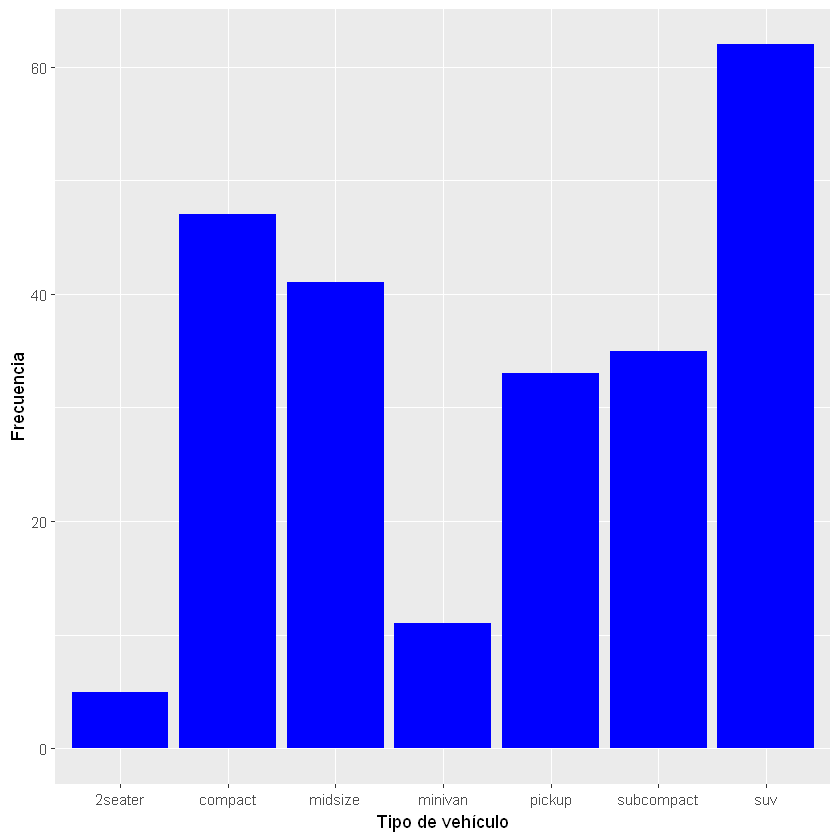

In [4]:
ggplot(mpg) +
  geom_bar(aes(x = class), fill = "blue") +
  xlab("Tipo de vehículo") +
  ylab("Frecuencia")

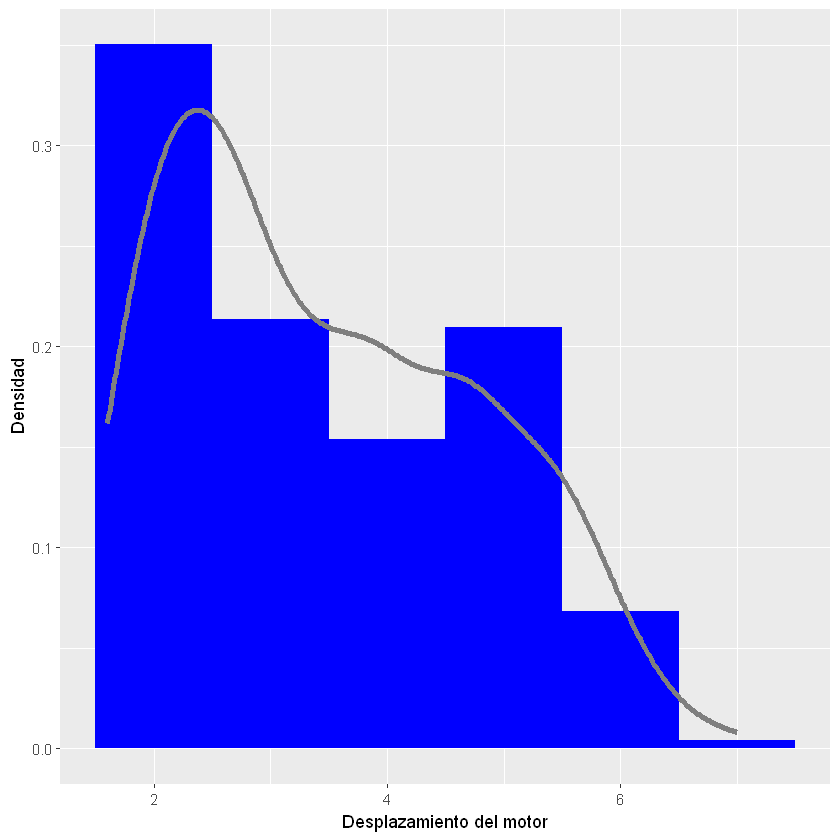

In [5]:
ggplot(mpg, aes(x = displ)) +
  geom_histogram(aes(y = after_stat(density)), binwidth = 1, fill = "blue") +
  geom_line(stat = "density", col = "gray50", linewidth = 1.5) +
  ylab("Densidad") +
  xlab("Desplazamiento del motor")

### Datos multivariados

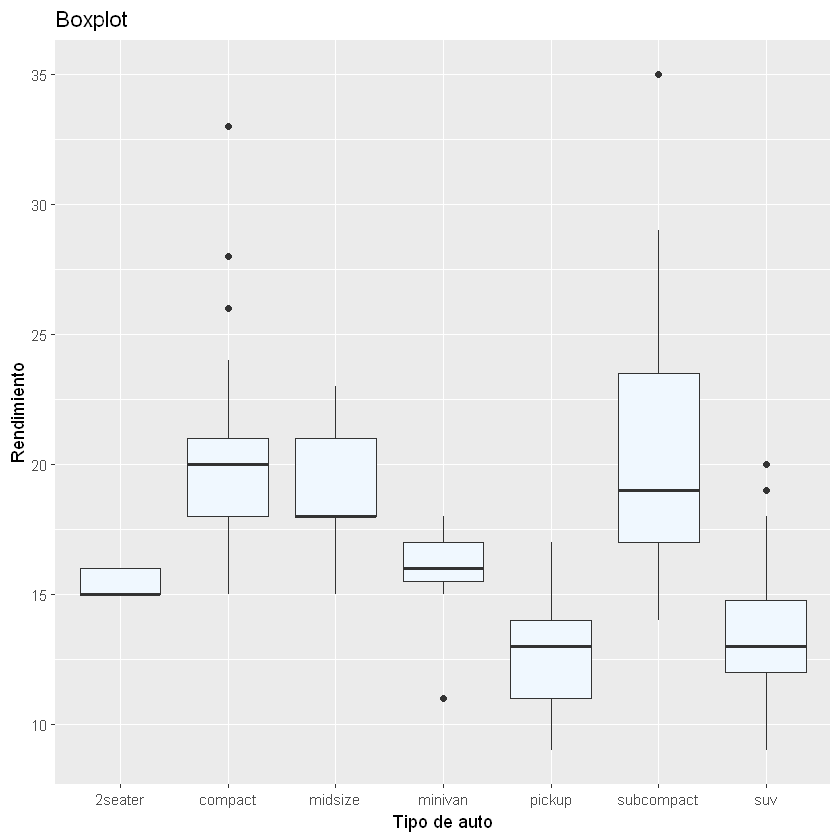

In [6]:
ggplot(data = mpg, aes(class, cty)) +
  geom_boxplot(fill = "aliceblue") +
  labs(title = "Boxplot", x = "Tipo de auto", y = "Rendimiento")

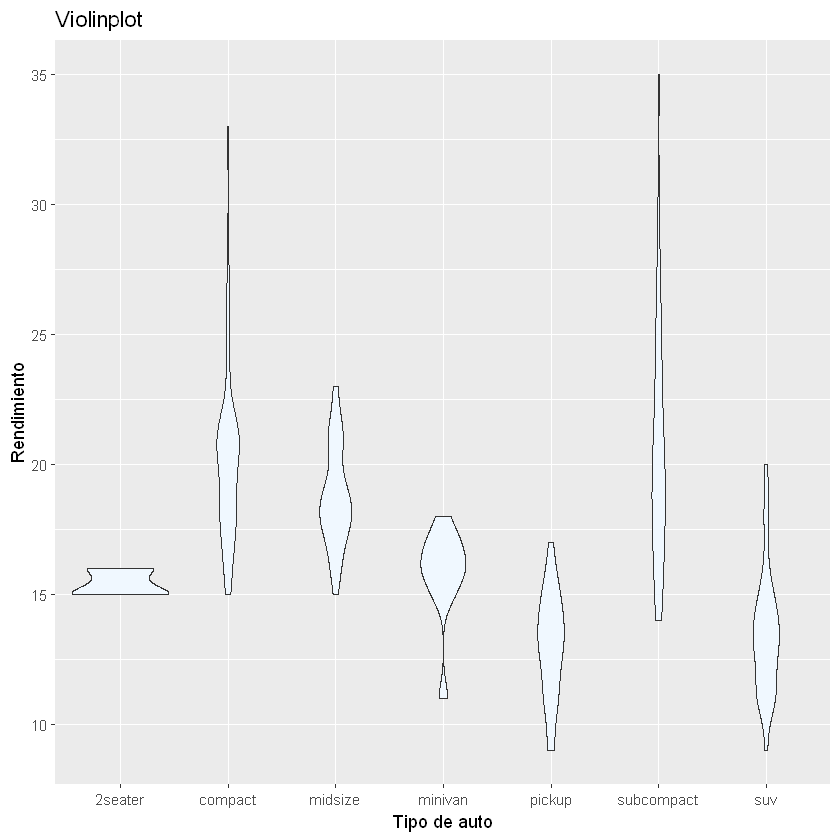

In [7]:
ggplot(data = mpg, aes(class, cty)) +
  geom_violin(fill = "aliceblue") +
  labs(title = "Violinplot", x = "Tipo de auto", y = "Rendimiento")

In [8]:
library(tidyverse)#permite usar 'pipes' %>% para secuencias de acciones
mpg_summary <- mpg %>%
  group_by(class) %>% # Agrupando por clase de vehículo
  summarize(mean_cty = mean(cty), # Media de rendimiento
    std_cty = sd(cty), # Desviación estándar de rendimiento
    N_cty = n(), # Número de observaciones
    se = std_cty / sqrt(N_cty), # Error estándar
    x_max = mean_cty + se, # Límite superior del intervalo
    x_min = mean_cty - se # Límite inferior del intervalo
  )

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ readr::col_factor() masks scales::col_factor()
✖ purrr::discard()    masks scales::discard()
✖ dplyr::filter()     masks stats::filter()
✖ dplyr::lag()        masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [25]:
# Reordenando por la media de rendimiento
mpg_summary$class <- reorder(mpg_summary$class, mpg_summary$mean_cty)
mpg_summary

class,mean_cty,std_cty,N_cty,se,x_max,x_min
<fct>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
2seater,15.40000,0.5477226,5,0.2449490,15.64495,15.15505
compact,20.12766,3.3854999,47,0.4938259,20.62149,19.63383
midsize,18.75610,1.9465416,41,0.3039987,19.06010,18.45210
minivan,15.81818,1.8340219,11,0.5529784,16.37116,15.26520
pickup,13.00000,2.0463382,33,0.3562218,13.35622,12.64378
subcompact,20.37143,4.6023377,35,0.7779371,21.14937,19.59349
suv,13.50000,2.4208791,62,0.3074520,13.80745,13.19255


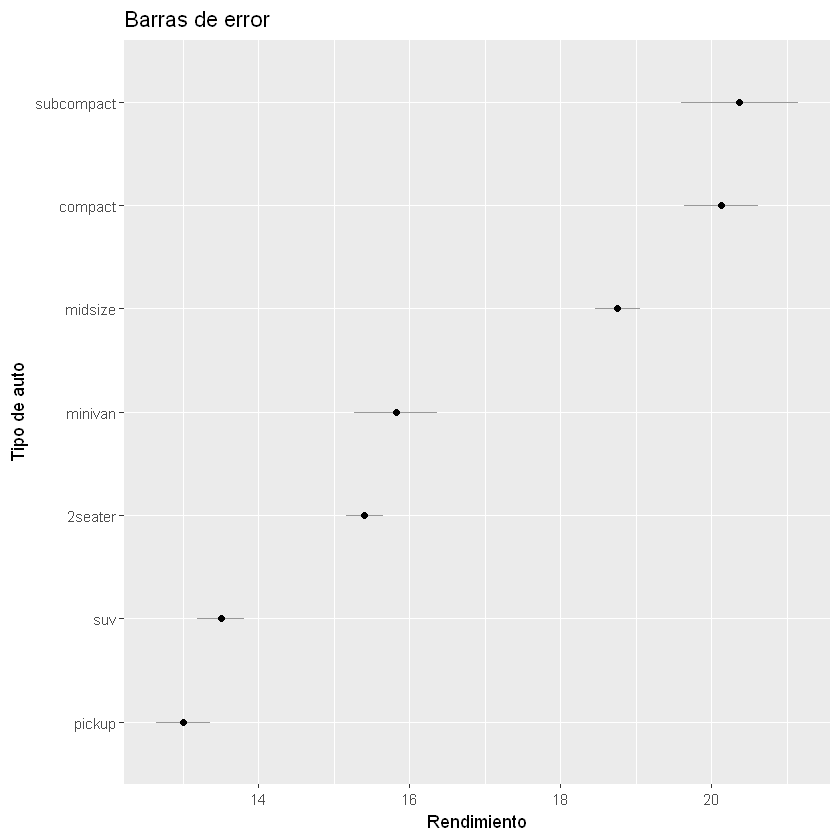

In [27]:
ggplot(mpg_summary, aes(x = mean_cty, xmax = x_max, xmin = x_min, y = class)) +
  geom_errorbarh(height = 0, color = "gray60") +
  geom_point(col = "black") +
  labs(title = "Barras de error", x = "Rendimiento", y = "Tipo de auto")

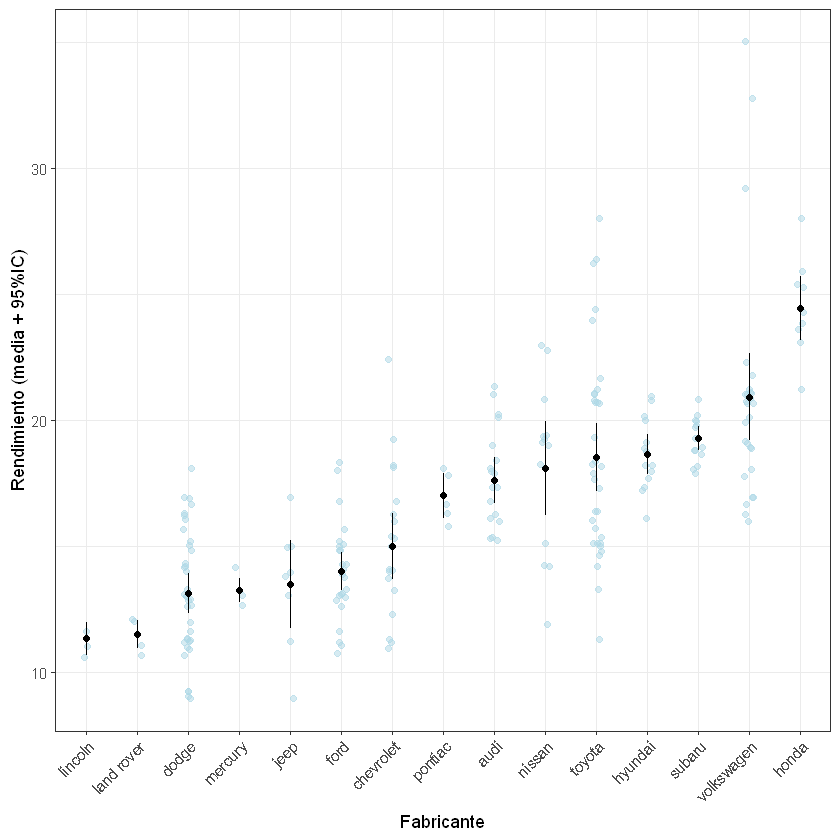

In [28]:
ggplot(mpg, aes(x = reorder(manufacturer, cty, FUN = mean), y = cty)) +
  geom_jitter(colour = "lightblue", alpha = 0.5, width = 0.1) +
  geom_point(stat = "summary", fun = "mean") +
  geom_errorbar(stat = "summary", fun.data = "mean_se",
                fun.args = list(mult = 1.96), width = 0) +
  labs(x = "Fabricante", y = "Rendimiento (media + 95%IC)") +
  theme_bw() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

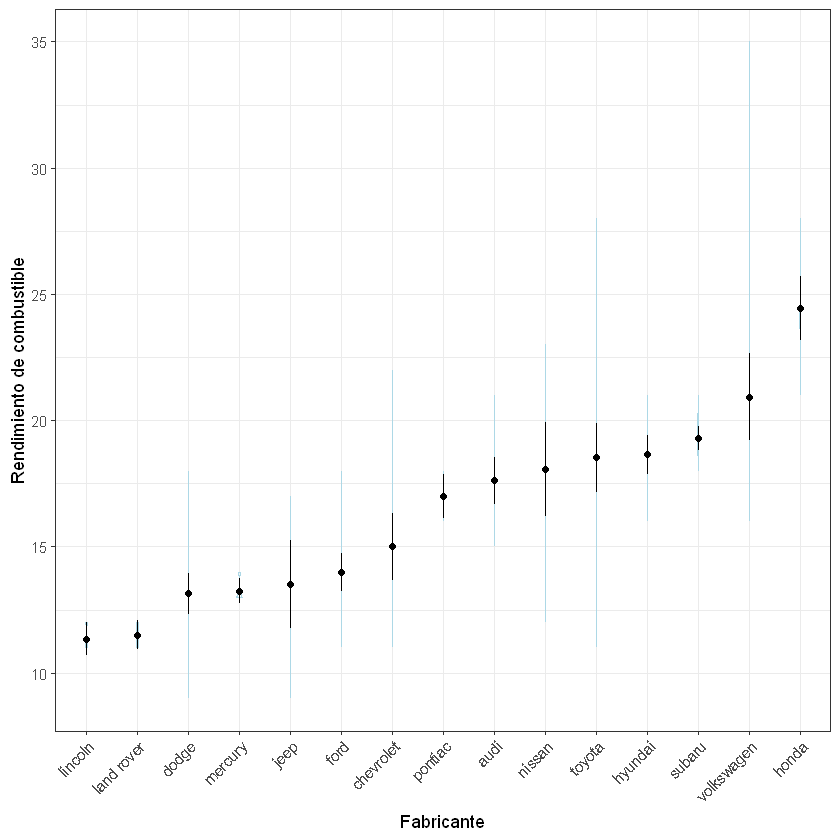

In [29]:
ggplot(mpg, aes(x = reorder(manufacturer, cty, FUN = mean), y = cty)) +
  geom_violin(colour = "lightblue", alpha = 0.5, width = 0.1) +
  geom_point(stat = "summary", fun = "mean") +
  geom_errorbar(stat = "summary", fun.data = "mean_se",
                fun.args = list(mult = 1.96), width = 0) +
  labs(x = "Fabricante", y = "Rendimiento de combustible") +
  theme_bw() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

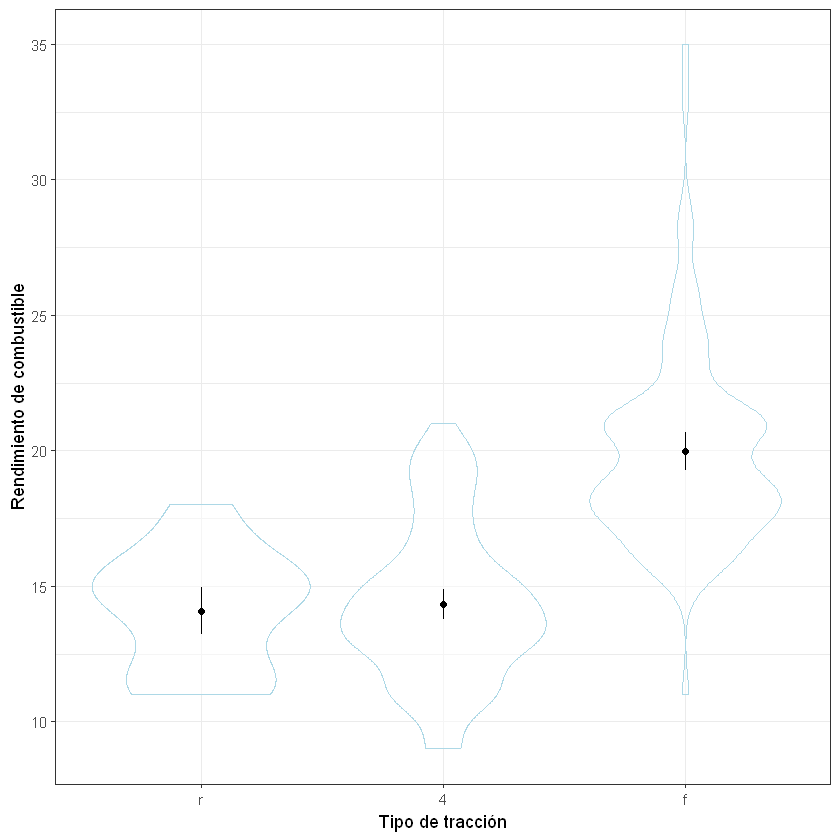

In [33]:
ggplot(mpg, aes(x = reorder(drv, cty, fun = mean), y = cty)) +
  geom_violin(colour = "lightblue", alpha = 0.5) +
  geom_point(stat = "summary", fun = "mean") +
  geom_errorbar(stat = "summary", fun.data = "mean_se",
                fun.args = list(mult = 1.96), width = 0) +
  labs(x = "Tipo de tracción", y = "Rendimiento de combustible") +
  theme_bw()

In [14]:
# Semilla para replicar resultados
set.seed(3939394)
data <- mpg[sample.int(nrow(mpg), size = 200, replace = FALSE), ]
#Reordenamiento
data$manufacturer <- reorder(data$manufacturer, data$cty)

In [15]:
medianas <- aggregate(data$displ, list(data$manufacturer), FUN = median)
names(medianas) <- c("manufacturer", "displ")
medianas$y_val <- as.numeric(medianas$manufacturer)
head(medianas)

,manufacturer,displ,y_val
,<fct>,<dbl>,<dbl>
1,lincoln,5.4,1
2,land rover,4.3,2
3,dodge,4.7,3
4,mercury,4.0,4
5,ford,4.6,5
6,jeep,4.2,6


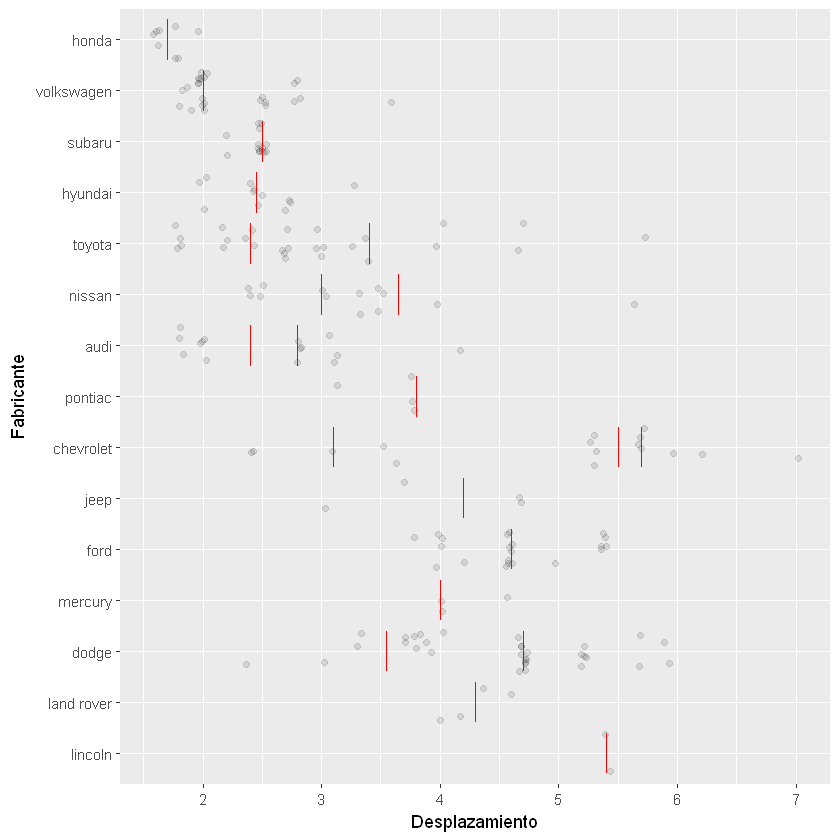

In [39]:
ggplot(data, aes(x = displ, y = manufacturer)) +
  geom_point(position = position_jitter(h = .4), alpha = 0.1) +
  geom_segment(data = medianas, col = "red",
               aes(x = displ, xend = displ,
                   y = y_val - .4, yend = y_val + .4)) +
  labs(x = "Desplazamiento", y = "Fabricante")

In [17]:
medianas <- aggregate(data$displ,
                      list(drv = data$drv,
                           manufacturer = data$manufacturer),
                      FUN = median)
names(medianas) <- c("drv", "manufacturer", "displ")
medianas$y_val <- as.numeric(medianas$manufacturer)
jit_val <- 0.6
head(medianas)

,drv,manufacturer,displ,y_val
,<chr>,<fct>,<dbl>,<dbl>
1,r,lincoln,5.40,1
2,4,land rover,4.30,2
3,4,dodge,4.70,3
4,f,dodge,3.55,3
5,4,mercury,4.00,4
6,4,ford,4.60,5


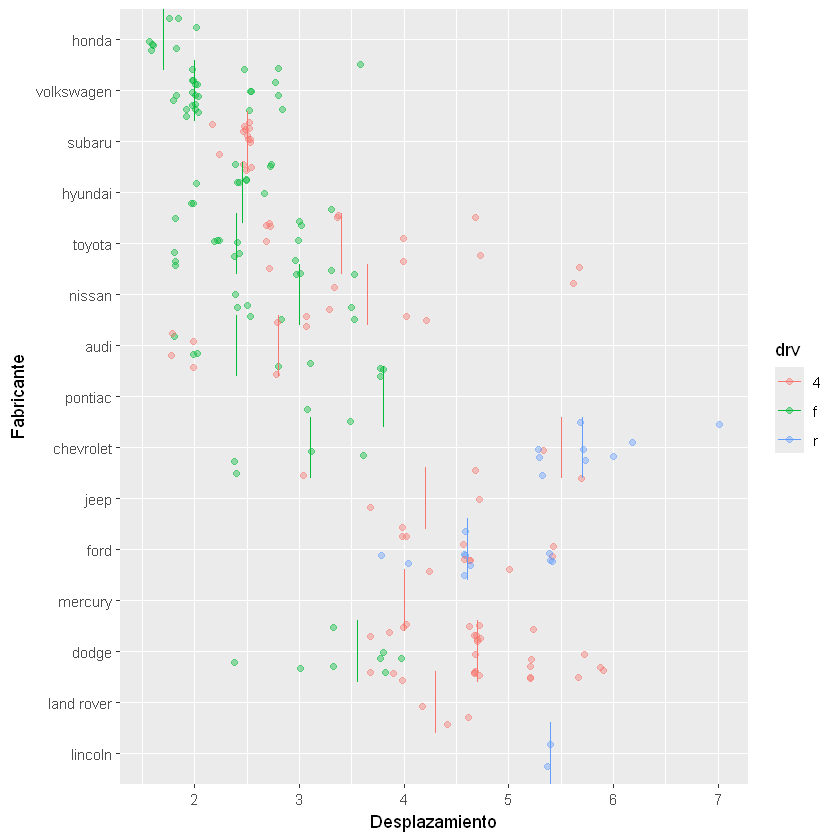

In [40]:
ggplot(data, aes(x = displ, y = manufacturer, group = drv, col = drv)) +
  geom_point(position = position_jitter(h = jit_val), alpha = 0.4) +
  geom_segment(data = medianas,
               aes(x = displ, xend = displ, group = drv, col = drv,
                   y = y_val - jit_val, yend = y_val + jit_val)) +
  labs(x = "Desplazamiento", y = "Fabricante")

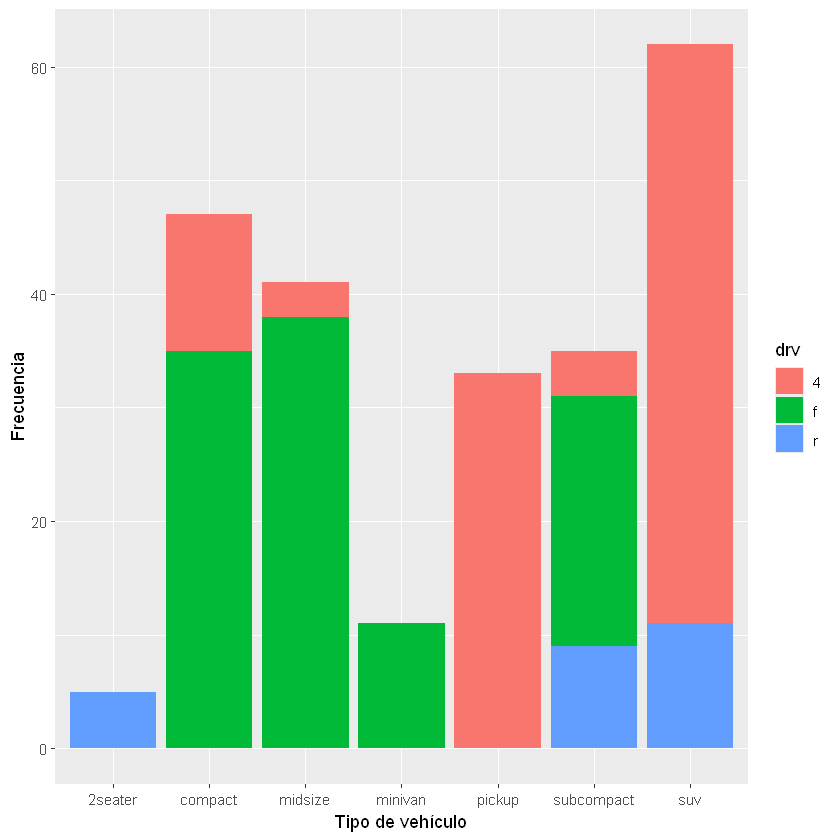

In [42]:
# Gráfica de barras apiladas
ggplot(mpg) +
  geom_bar(aes(x = class, fill = drv)) +
  xlab("Tipo de vehículo") +
  ylab("Frecuencia")

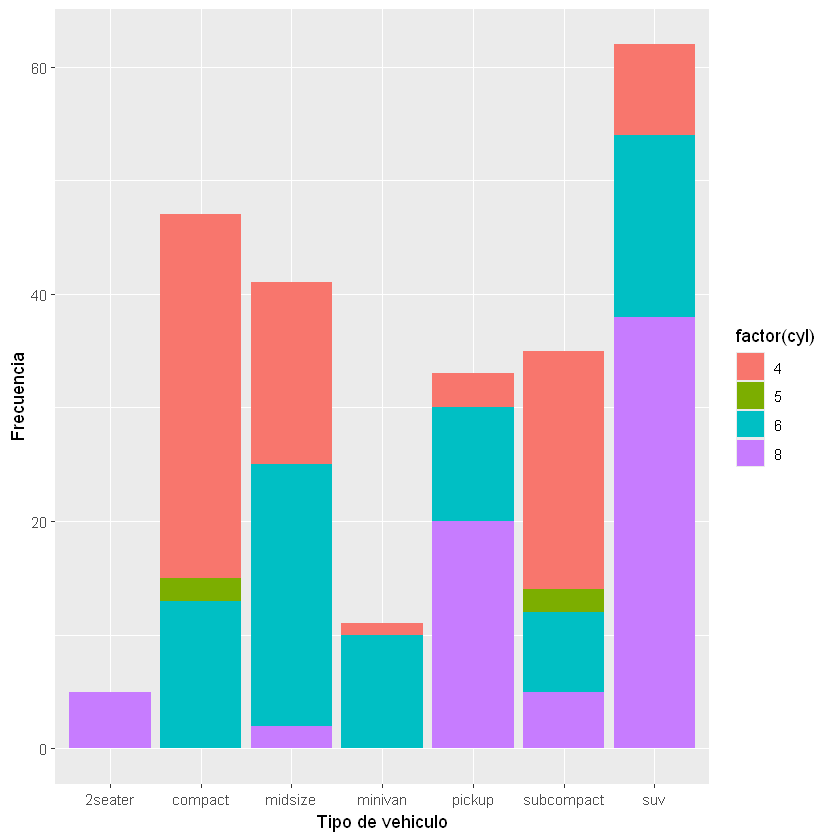

In [44]:
# Para el caso de cyl se debe aplicar factor
ggplot(mpg) +
  geom_bar(aes(x = class, fill = factor(cyl))) +
  xlab("Tipo de vehiculo") +
  ylab("Frecuencia")

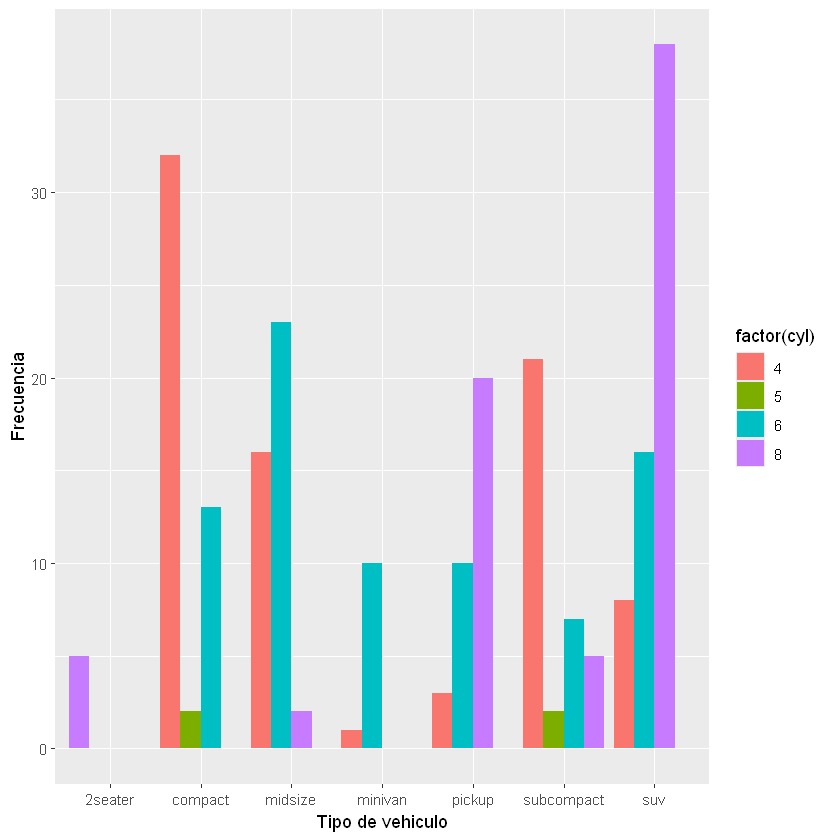

In [45]:
# Sin apilar
ggplot(mpg) +
  geom_bar(aes(x = class, fill = factor(cyl)),
           position = position_dodge(preserve = "single")) +
  xlab("Tipo de vehiculo") +
  ylab("Frecuencia")